In [1]:
#AlJannat of CyberGuardians_6
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Viewing the dataset
malware_df = pd.read_csv("malware_dataset.csv")
malware_df.head()

,file_size_kb,has_dll_imports,has_exe_header,num_sections,entropy,is_malicious
0,2490,1,1,2,7.064823,0
1,1705,1,1,3,7.572794,0
2,5155,1,1,4,6.045934,1
3,1463,1,1,3,5.309018,0
4,6293,1,1,7,6.824600,1


In [3]:
#Having a look at the shape - number of rows and columns
malware_df.shape

(1000, 6)

In [4]:
#Summarizing some statistical features
malware_df.describe()

,file_size_kb,has_dll_imports,has_exe_header,num_sections,entropy,is_malicious
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3859.950000,0.867000,0.901000,5.012000,6.269894,0.487000
std,2611.901009,0.339745,0.298811,2.588157,1.357751,0.500081
min,16.000000,0.000000,0.000000,1.000000,3.001903,0.000000
25%,1743.250000,1.000000,1.000000,3.000000,5.526516,0.000000
50%,3401.500000,1.000000,1.000000,5.000000,6.617730,0.000000
75%,5365.500000,1.000000,1.000000,7.000000,7.307468,1.000000
max,9998.000000,1.000000,1.000000,9.000000,7.994337,1.000000


In [5]:
#Checking for missing values, there are none
malware_df.isna().sum()

,0
file_size_kb,0
has_dll_imports,0
has_exe_header,0
num_sections,0
entropy,0
is_malicious,0


In [6]:
#Checking for duplicates, none too
print(malware_df.duplicated().sum())

0


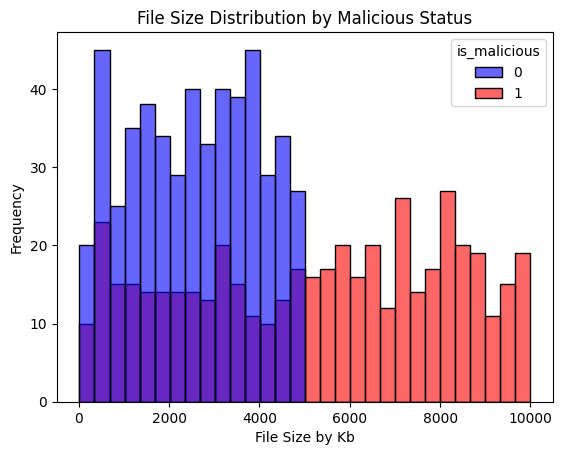

In [49]:
sns.histplot(data=malware_df, x='file_size_kb', hue='is_malicious', bins=30,
             palette=['blue', 'red'], alpha=0.6)
plt.xlabel("File Size by Kb")
plt.ylabel("Frequency")
plt.title('File Size Distribution by Malicious Status');
plt.savefig("../Visualizations/file_size_of_malicious.png")

FileNotFoundError: [Errno 2] No such file or directory: '../Visualizations/num_of_malicious_sections.png'

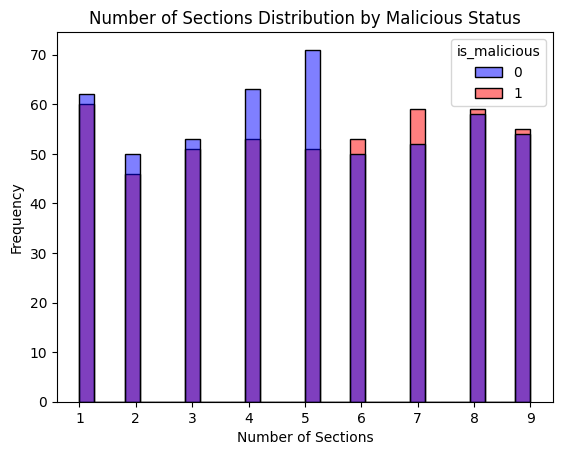

In [9]:
sns.histplot(data=malware_df, x='num_sections', hue='is_malicious', bins=30,
             palette=['blue', 'red'], alpha=0.5)
plt.xlabel("Number of Sections")
plt.ylabel("Frequency")
plt.title('Number of Sections Distribution by Malicious Status');
plt.savefig("../Visualizations/num_of_malicious_sections.png")

In [10]:
import pandas as pd # Khalil Haruna Aminu
import numpy as np
def create_features(df):
    # Feature: Size per section (often higher in packed malware)
    df['size_per_section'] = df['file_size_kb'] / (df['num_sections'] + 1e-5)
    # Feature: Entropy-to-size ratio (high entropy in small files is suspicious)
    df['entropy_size_ratio'] = df['entropy'] / (df['file_size_kb'] + 1)
    # Feature: Combined header indicator (both DLL and EXE headers)
    df['dll_and_exe'] = df['has_dll_imports'] & df['has_exe_header']
    # Feature: Entropy bins (discretize entropy for non-linear relationships)
    df['entropy_bin'] = pd.cut(df['entropy'], bins=[0, 5, 6.5, 7.5, 9], labels=False)
    # Feature: Size categories (small: <500KB, medium: 500-3000KB, large: >3000KB)
    df['size_category'] = pd.cut(df['file_size_kb'],
                                 bins=[0, 500, 3000, float('inf')],
                                 labels=[0, 1, 2])
    # Interaction: Entropy * Sections (obfuscation detection)
    df['entropy_sections'] = df['entropy'] * df['num_sections']
    return df # AI ASSITED

# Khalil Haruna Aminu

In [11]:
from sklearn.preprocessing import PowerTransformer, StandardScaler  # Khalil Haruna Aminu
def transform_features(df):
    # Handle skewness with Yeo-Johnson transform
    pt = PowerTransformer()
    skewed_features = ['file_size_kb', 'size_per_section']
    df[skewed_features] = pt.fit_transform(df[skewed_features])
    # Scale continuous features
    continuous_features = ['entropy', 'size_per_section', 'entropy_size_ratio']
    scaler = StandardScaler()
    df[continuous_features] = scaler.fit_transform(df[continuous_features])
    return df

# Khalil Haruna Aminu

In [12]:
def select_features(df):                # Khalil Haruna Aminu
    # Drop original skewed features after transformation
    df = df.drop(columns=['file_size_kb'])
    # Drop low-variance features
    df = df.loc[:, df.nunique() > 1]
    return df

# Khalil Haruna Aminu

In [13]:
from sklearn.pipeline import Pipeline       # Khalil Haruna Aminu
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
# Complete feature engineering pipeline
feature_pipeline = Pipeline([
('creation', FunctionTransformer(create_features)),
('transformation', FunctionTransformer(transform_features)),
('selection', FunctionTransformer(select_features))
])
# Apply to dataset
df = pd.read_csv('malware_dataset.csv')
engineered_df = feature_pipeline.fit_transform(df)

# Khalil Haruna Aminu

In [14]:
from sklearn.model_selection import train_test_split      # Khalil Haruna Aminu
X = engineered_df.drop('is_malicious', axis=1)
y = engineered_df['is_malicious']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khalil Haruna Aminu

In [15]:
from sklearn.ensemble import RandomForestClassifier       # Khalil Haruna Aminu
model = RandomForestClassifier(random_state=42)

# Khalil Haruna Aminu

In [16]:
model.fit(X_train, y_train)      # Khalil Haruna Aminu

RandomForestClassifier(random_state=42)

# Khalil Haruna Aminu

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score    # Khalil Haruna Aminu
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8250
Precision: 0.8447
Recall: 0.8208
F1 Score: 0.8325


# Khalil Haruna Aminu

In [18]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)     # Khalil Haruna Aminu
sorted_feature_importances = feature_importances.sort_values(ascending=False)
display(sorted_feature_importances) # AI ASSISTED

,0
entropy,0.319062
entropy_size_ratio,0.172261
size_per_section,0.136905
entropy_bin,0.130377
entropy_sections,0.091730
has_dll_imports,0.063601
num_sections,0.029268
size_category,0.025740
dll_and_exe,0.021836
has_exe_header,0.009220


In [19]:
engineered_df.to_csv('engineered_malware_dataset.csv', index=False)       # Khalil Haruna Aminu

# Khalil Haruna Aminu

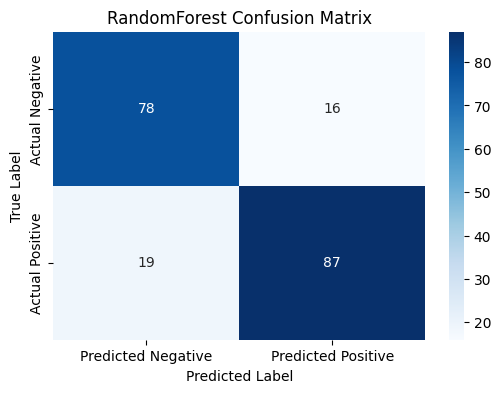

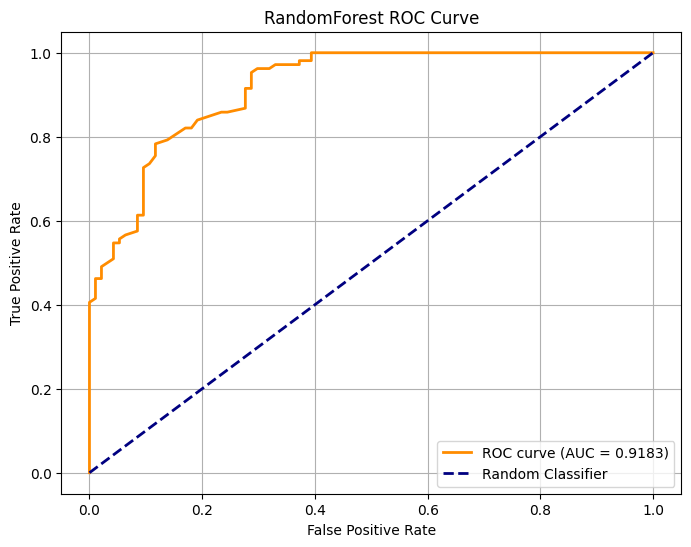

RandomForest ROC AUC Score: 0.9183


In [20]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score           # Khalil Haruna Aminu
import seaborn as sns
import matplotlib.pyplot as plt
# Use the trained RandomForest model to predict probabilities on the test set
y_pred_proba_rf = model.predict_proba(X_test)[:, 1]
# Convert probabilities to binary predictions using a threshold of 0.5
y_pred_rf = (y_pred_proba_rf > 0.5).astype(int)
# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('RandomForest Confusion Matrix')
plt.show()
# Calculate the ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
# Compute the AUC score
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print(f"RandomForest ROC AUC Score: {auc_rf:.4f}")

In [23]:
import tensorflow as tf                                      # Khalil Haruna Aminu
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
# Define a function to build a simple MLP model
def build_simple_mlp_model(input_shape):
    inputs = Input(shape=(input_shape,))
    # Add dense layers
    x = Dense(64, activation='relu')(inputs)
    x = Dense(32, activation='relu')(x)
    # Output layer for binary classification
    outputs = Dense(1, activation='sigmoid')(x)
    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model
# Instantiate the simple MLP model
# Assuming X_train_np is available from a previous step and has the correct shape
# If not, this will fail and require fixing the data loading/preparation steps
try:
    # Convert DataFrames to NumPy arrays if they aren't already
    X_train_np = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
    X_test_np = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
    y_train_np = y_train.values if isinstance(y_train, pd.Series) else y_train
    y_test_np = y_test.values if isinstance(y_test, pd.Series) else y_test
    num_features = X_train_np.shape[1]
    simple_mlp_model = build_simple_mlp_model(num_features)
    # Compile the model
    simple_mlp_model.compile(optimizer='adam',
                             loss='binary_crossentropy',
                             metrics=['accuracy'])
    print("Simple MLP model built and compiled successfully.")
    simple_mlp_model.summary()
except NameError:
    print("Error: X_train_np is not defined. Please ensure data preparation is completed.")
    # Set simple_mlp_model to None or handle the error appropriately
    simple_mlp_model = None                # AI ASSITED

Simple MLP model built and compiled successfully.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Verify that the data is in NumPy array format                              # Khalil Haruna Aminu
print("Is X_train_np a NumPy array?", isinstance(X_train_np, np.ndarray))
print("Is X_test_np a NumPy array?", isinstance(X_test_np, np.ndarray))
print("Is y_train_np a NumPy array?", isinstance(y_train_np, np.ndarray))
print("Is y_test_np a NumPy array?", isinstance(y_test_np, np.ndarray))

# Print the shapes of the NumPy arrays
print("Shape of X_train_np:", X_train_np.shape)
print("Shape of X_test_np:", X_test_np.shape)
print("Shape of y_train_np:", y_train_np.shape)
print("Shape of y_test_np:", y_test_np.shape)

Is X_train_np a NumPy array? True
Is X_test_np a NumPy array? True
Is y_train_np a NumPy array? True
Is y_test_np a NumPy array? True
Shape of X_train_np: (800, 10)
Shape of X_test_np: (200, 10)
Shape of y_train_np: (800,)
Shape of y_test_np: (200,)


In [27]:
import keras_tuner as kt                                    # Khalil Haruna Aminu
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

# Define the model building function for Keras Tuner
def build_tuned_simple_mlp(hp):
    inputs = Input(shape=(X_train_np.shape[1],))

    # Tune the number of units in the first Dense layer
    hp_units1 = hp.Int('units1', min_value=32, max_value=256, step=32)
    x = Dense(units=hp_units1, activation='relu')(inputs)

    # Tune the number of units in the second Dense layer
    hp_units2 = hp.Int('units2', min_value=16, max_value=128, step=16)
    x = Dense(units=hp_units2, activation='relu')(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Instantiate the Keras Tuner (Hyperband tuner)
# Configure the search space and objective
tuner = kt.Hyperband(
    build_tuned_simple_mlp,
    objective='val_accuracy',
    max_epochs=10,  # Maximum number of epochs to train a model
    factor=3,       # Factor by which the number of epochs is reduced/increased
    directory='simple_mlp_keras_tuner_dir', # Directory to save the search results
    project_name='malware_detection_simple_mlp'
)

# Define the search parameters
# Batch size and epochs will be handled implicitly by the tuner's fit method
# or can be specified during the search. We will use the values in fit().

print("Keras Tuner instantiated. Starting hyperparameter search for simple MLP...")

# Perform the hyperparameter search
# Use a subset of the training data for faster tuning if needed
tuner.search(X_train_np, y_train_np, epochs=10, validation_split=0.2, batch_size=32)

# Get the best hyperparameters
best_hps_simple_mlp = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of units in the first dense layer for the simple MLP is {best_hps_simple_mlp.get('units1')}.
The optimal number of units in the second dense layer for the simple MLP is {best_hps_simple_mlp.get('units2')}.
The optimal learning rate for the simple MLP optimizer is {best_hps_simple_mlp.get('learning_rate')}.
""")        # AI ASSISTED

Trial 30 Complete [00h 00m 06s]
val_accuracy: 0.7875000238418579

Best val_accuracy So Far: 0.8062499761581421
Total elapsed time: 00h 01m 46s

The optimal number of units in the first dense layer for the simple MLP is 32.
The optimal number of units in the second dense layer for the simple MLP is 64.
The optimal learning rate for the simple MLP optimizer is 0.01.



In [ ]:
from sklearn.model_selection import StratifiedKFold           # Khalil Haruna Aminu
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

# Define a function to build the simple MLP model with the best hyperparameters
def build_simple_mlp_model_tuned(input_shape, units1, units2, learning_rate):
    inputs = tf.keras.Input(shape=(input_shape,))
    x = Dense(units=units1, activation='relu')(inputs)
    x = Dense(units=units2, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Get the best hyperparameters from the previous tuning step
# Assume best_hps_simple_mlp is available from the previous tuning cell
try:
    best_units1_simple_mlp = best_hps_simple_mlp.get('units1')
    best_units2_simple_mlp = best_hps_simple_mlp.get('units2')
    best_learning_rate_simple_mlp = best_hps_simple_mlp.get('learning_rate')
    print(f"Using best hyperparameters for simple MLP: units1={best_units1_simple_mlp}, units2={best_units2_simple_mlp}, learning_rate={best_learning_rate_simple_mlp}")
except NameError:
    print("Error: best_hps_simple_mlp not found. Please run the hyperparameter tuning step for simple MLP first.")
    # Use default or previously known good hyperparameters if tuning failed
    best_units1_simple_mlp = 64 # Default or example value
    best_units2_simple_mlp = 32  # Default or example value
    best_learning_rate_simple_mlp = 0.001 # Default or example value
    print(f"Using fallback hyperparameters for simple MLP: units1={best_units1_simple_mlp}, units2={best_units2_simple_mlp}, learning_rate={best_learning_rate_simple_mlp}")


# Initialize StratifiedKFold
n_splits = 5 # Using 5 splits for cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores_simple_mlp = []
precision_scores_simple_mlp = []
recall_scores_simple_mlp = []
f1_scores_simple_mlp = []
roc_auc_scores_simple_mlp = []

# Perform cross-validation
print(f"\nStarting {n_splits}-fold cross-validation for simple MLP...")

# Ensure X_train_np and y_train_np are NumPy arrays
X_train_np = X_train.values if isinstance(X_train, pd.DataFrame) else X_train_np
y_train_np = y_train.values if isinstance(y_train, pd.Series) else y_train_np


for fold, (train_index, val_index) in enumerate(skf.split(X_train_np, y_train_np)):
    print(f"\n--- Simple MLP Fold {fold + 1}/{n_splits} ---")

    # Split data for the current fold
    X_train_fold, X_val_fold = X_train_np[train_index], X_train_np[val_index]
    y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[val_index]

    # Build a new model instance for each fold
    simple_mlp_model_fold = build_simple_mlp_model_tuned(input_shape=X_train_fold.shape[1],
                                                         units1=best_units1_simple_mlp,
                                                         units2=best_units2_simple_mlp,
                                                         learning_rate=best_learning_rate_simple_mlp)

    # Define Early Stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model on the current fold's training data
    history = simple_mlp_model_fold.fit(X_train_fold, y_train_fold,
                                        epochs=20, # Use a reasonable number of epochs
                                        batch_size=32,
                                        validation_data=(X_val_fold, y_val_fold),
                                        callbacks=[early_stopping],
                                        verbose=0) # Set verbose to 1 to see training progress

    # Evaluate the model on the current fold's validation data
    y_pred_proba_fold = simple_mlp_model_fold.predict(X_val_fold).ravel()
    y_pred_fold = (y_pred_proba_fold > 0.5).astype(int)

    fold_accuracy = accuracy_score(y_val_fold, y_pred_fold)
    fold_precision = precision_score(y_val_fold, y_pred_fold)
    fold_recall = recall_score(y_val_fold, y_pred_fold)
    fold_f1 = f1_score(y_val_fold, y_pred_fold)
    fold_roc_auc = roc_auc_score(y_val_fold, y_pred_proba_fold)

    # Store metrics
    accuracy_scores_simple_mlp.append(fold_accuracy)
    precision_scores_simple_mlp.append(fold_precision)
    recall_scores_simple_mlp.append(fold_recall)
    f1_scores_simple_mlp.append(fold_f1)
    roc_auc_scores_simple_mlp.append(fold_roc_auc)

    print(f"Simple MLP Fold {fold + 1} Metrics:")
    print(f"  Accuracy: {fold_accuracy:.4f}")
    print(f"  Precision: {fold_precision:.4f}")
    print(f"  Recall: {fold_recall:.4f}")
    print(f"  F1 Score: {fold_f1:.4f}")
    print(f"  ROC-AUC: {fold_roc_auc:.4f}")               # AI ASSISTED

# Calculate and print the mean and standard deviation of the metrics
print("\n--- Simple MLP Cross-validation results ---")
print(f"Average Accuracy: {np.mean(accuracy_scores_simple_mlp):.4f} (+/- {np.std(accuracy_scores_simple_mlp):.4f})")
print(f"Average Precision: {np.mean(precision_scores_simple_mlp):.4f} (+/- {np.std(precision_scores_simple_mlp):.4f})")
print(f"Average Recall: {np.mean(recall_scores_simple_mlp):.4f} (+/- {np.std(recall_scores_simple_mlp):.4f})")
print(f"Average F1 Score: {np.mean(f1_scores_simple_mlp):.4f} (+/- {np.std(f1_scores_simple_mlp):.4f})")
print(f"Average ROC-AUC: {np.mean(roc_auc_scores_simple_mlp):.4f} (+/- {np.std(roc_auc_scores_simple_mlp):.4f})")

Using best hyperparameters for simple MLP: units1=192, units2=64, learning_rate=0.01

Starting 5-fold cross-validation for simple MLP...

--- Simple MLP Fold 1/5 ---
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Simple MLP Fold 1 Metrics:
  Accuracy: 0.8500
  Precision: 0.8171
  Recall: 0.8816
  F1 Score: 0.8481
  ROC-AUC: 0.9497

--- Simple MLP Fold 2/5 ---
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Simple MLP Fold 2 Metrics:
  Accuracy: 0.8187
  Precision: 0.7582
  Recall: 0.9079
  F1 Score: 0.8263
  ROC-AUC: 0.9173

--- Simple MLP Fold 3/5 ---
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Simple MLP Fold 3 Metrics:
  Accuracy: 0.8125
  Precision: 0.7500
  Recall: 0.9079
  F1 Score: 0.8214
  ROC-AUC: 0.9148

--- Simple MLP Fold 4/5 ---
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Simple MLP Fold 4 Metrics:
  Accuracy: 0.8375
  Precision: 0.7778
  Recall: 0.9211
  F1 Score: 0.8434
  ROC-AUC: 0.9306

--- Simple MLP Fold 5/5 ---
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Simple MLP Fold 5 Metrics:
  Accuracy: 0.8125
  

In [ ]:
import tensorflow as                                    # Khalil Haruna Aminu
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Define a function to build the simple MLP model with the best hyperparameters
def build_simple_mlp_model_tuned(input_shape, units1, units2, learning_rate):
    inputs = tf.keras.Input(shape=(input_shape,))
    x = Dense(units=units1, activation='relu')(inputs)
    x = Dense(units=units2, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Get the best hyperparameters from the previous tuning step
# Assume best_hps_simple_mlp is available from the previous tuning cell
try:
    best_units1_simple_mlp = best_hps_simple_mlp.get('units1')
    best_units2_simple_mlp = best_hps_simple_mlp.get('units2')
    best_learning_rate_simple_mlp = best_hps_simple_mlp.get('learning_rate')
    print(f"Using best hyperparameters for final simple MLP: units1={best_units1_simple_mlp}, units2={best_units2_simple_mlp}, learning_rate={best_learning_rate_simple_mlp}")
except NameError:
    print("Error: best_hps_simple_mlp not found. Please run the hyperparameter tuning step for simple MLP first.")
    # Use default or previously known good hyperparameters if tuning failed
    best_units1_simple_mlp = 64 # Default or example value
    best_units2_simple_mlp = 32  # Default or example value
    best_learning_rate_simple_mlp = 0.001 # Default or example value
    print(f"Using fallback hyperparameters for final simple MLP: units1={best_units1_simple_mlp}, units2={best_units2_simple_mlp}, learning_rate={best_learning_rate_simple_mlp}")

# Build the final model with the best hyperparameters on the entire training data shape
num_features = X_train_np.shape[1]
final_simple_mlp_model = build_simple_mlp_model_tuned(input_shape=num_features,
                                                     units1=best_units1_simple_mlp,
                                                     units2=best_units2_simple_mlp,
                                                     learning_rate=best_learning_rate_simple_mlp)

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the final model on the entire training dataset
print("Training the final simple MLP model on the entire training dataset...")
history_final_simple_mlp = final_simple_mlp_model.fit(X_train_np, y_train_np,
                                                      epochs=50, # Use a reasonable number of epochs
                                                      batch_size=64, # Use a suitable batch size
                                                      validation_split=0.1, # Use a small validation split to monitor training
                                                      callbacks=[early_stopping],
                                                      verbose=1) # Set verbose to 1 to see training progress

print("Final simple MLP model training complete.")       # AI ASSITED

Using best hyperparameters for final simple MLP: units1=192, units2=64, learning_rate=0.01
Training the final simple MLP model on the entire training dataset...
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5595 - loss: 2.9089 - val_accuracy: 0.6750 - val_loss: 0.6465
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5762 - loss: 0.7083 - val_accuracy: 0.7375 - val_loss: 0.5272
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7520 - loss: 0.4903 - val_accuracy: 0.7375 - val_loss: 0.4945
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8021 - loss: 0.4510 - val_accuracy: 0.7250 - val_loss: 0.4717
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7823 - loss: 0.4202 - val_accuracy: 0.7375 - val_loss: 0.4595
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7626 - loss: 0.4342 - val_accuracy: 0.7625 - val_loss: 0.4588
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8032 - loss: 0.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Predict probabilities on the test set
y_pred_proba_test_simple_mlp = final_simple_mlp_model.predict(X_test_np).ravel()
# Convert probabilities to binary predictions
y_pred_test_simple_mlp = (y_pred_proba_test_simple_mlp > 0.5).astype(int)
# Calculate evaluation metrics
accuracy_simple_mlp = accuracy_score(y_test_np, y_pred_test_simple_mlp)
precision_simple_mlp = precision_score(y_test_np, y_pred_test_simple_mlp)
recall_simple_mlp = recall_score(y_test_np, y_pred_test_simple_mlp)
f1_simple_mlp = f1_score(y_test_np, y_pred_test_simple_mlp)
# Print the metrics
print("Simple MLP Model Evaluation on Test Set:")
print(f"Accuracy: {accuracy_simple_mlp:.4f}")
print(f"Precision: {precision_simple_mlp:.4f}")
print(f"Recall: {recall_simple_mlp:.4f}")
print(f"F1 Score: {f1_simple_mlp:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Simple MLP Model Evaluation on Test Set:
Accuracy: 0.8000
Precision: 0.7661
Recall: 0.8962
F1 Score: 0.8261


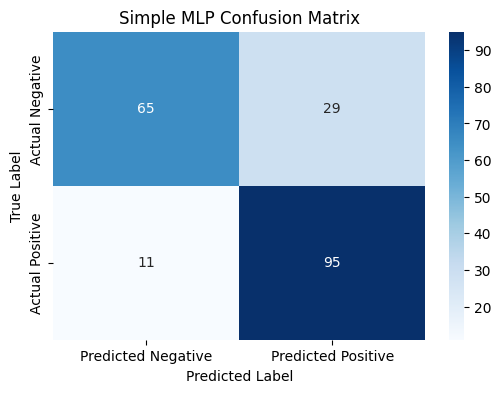

In [ ]:
from sklearn.metrics import confusion_matrix               # Khalil Haruna Aminu
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix for the simple MLP
cm_simple_mlp = confusion_matrix(y_test_np, y_pred_test_simple_mlp)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_simple_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Simple MLP Confusion Matrix')
plt.show()

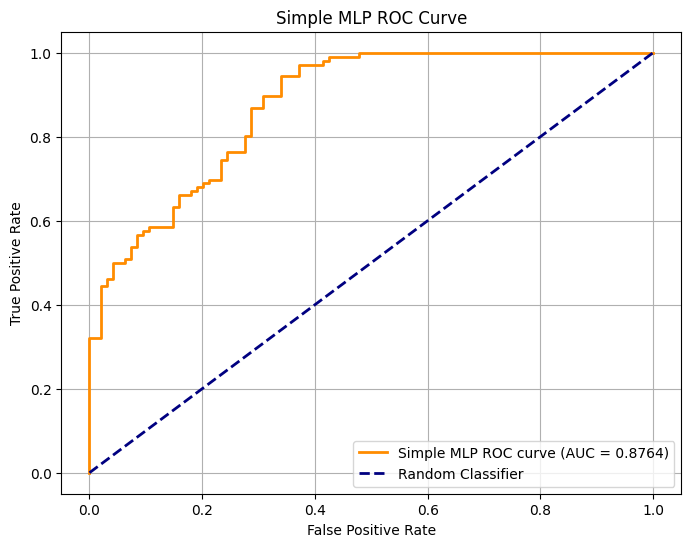

Simple MLP ROC AUC Score: 0.8764


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score              # Khalil Haruna Aminu
import matplotlib.pyplot as plt

# Calculate the ROC curve for the simple MLP
fpr_simple_mlp, tpr_simple_mlp, thresholds_simple_mlp = roc_curve(y_test_np, y_pred_proba_test_simple_mlp)

# Compute the AUC score for the simple MLP
auc_simple_mlp = roc_auc_score(y_test_np, y_pred_proba_test_simple_mlp)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_simple_mlp, tpr_simple_mlp, color='darkorange', lw=2, label=f'Simple MLP ROC curve (AUC = {auc_simple_mlp:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Simple MLP ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"Simple MLP ROC AUC Score: {auc_simple_mlp:.4f}")

Simple MLP False Positive Samples:


,has_dll_imports,has_exe_header,num_sections,entropy,size_per_section,entropy_size_ratio,dll_and_exe,entropy_bin,size_category,entropy_sections
678,1,1,1,0.857542,1.415073,-0.125220,1,2,2,7.433641
626,1,1,1,0.411052,1.219793,-0.112078,1,2,1,6.827721
899,1,1,1,0.796379,1.681295,-0.153685,1,2,2,7.350637
101,1,1,7,1.152088,-0.129537,-0.158472,1,3,2,54.833520
902,1,1,8,0.327214,-0.397098,-0.156350,1,2,2,53.711571



Simple MLP False Negative Samples:


,has_dll_imports,has_exe_header,num_sections,entropy,size_per_section,entropy_size_ratio,dll_and_exe,entropy_bin,size_category,entropy_sections
521,1,0,9,-0.171515,-1.379690,0.015901,0,1,1,54.334225
210,1,1,2,0.202791,-0.104808,0.012775,1,2,1,13.090192
542,1,1,8,0.111006,-1.769673,0.309635,1,1,1,51.364296
604,1,1,1,0.463417,-0.960267,1.310313,1,2,0,6.898784
493,1,1,2,0.427617,-0.694039,0.303764,1,2,1,13.700403



Descriptive statistics for Simple MLP False Positives:


,has_dll_imports,has_exe_header,num_sections,entropy,size_per_section,entropy_size_ratio,dll_and_exe,entropy_bin,entropy_sections
count,29.0,29.0,29.000000,29.000000,29.000000,29.000000,29.0,29.000000,29.000000
mean,1.0,1.0,4.379310,0.599251,0.086801,0.191797,1.0,2.068966,31.350884
std,0.0,0.0,2.691439,0.436391,1.083068,1.472414,0.0,0.703615,19.934417
min,1.0,1.0,1.000000,-0.237173,-3.205453,-0.180155,1.0,1.000000,5.948034
25%,1.0,1.0,2.000000,0.327214,-0.355180,-0.158472,1.0,2.000000,13.667715
50%,1.0,1.0,4.000000,0.656337,0.288066,-0.142941,1.0,2.000000,27.738495
75%,1.0,1.0,7.000000,0.912011,0.657354,-0.102505,1.0,3.000000,48.128735
max,1.0,1.0,9.000000,1.248909,1.681295,7.767832,1.0,3.000000,68.709719



Descriptive statistics for Simple MLP False Negatives:


,has_dll_imports,has_exe_header,num_sections,entropy,size_per_section,entropy_size_ratio,dll_and_exe,entropy_bin,entropy_sections
count,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,1.0,0.818182,4.636364,0.182368,-1.047900,0.334538,0.818182,1.636364,29.443419
std,0.0,0.404520,2.838053,0.254076,0.548749,0.419677,0.404520,0.504525,17.011065
min,1.0,0.000000,1.000000,-0.187717,-1.838759,-0.162706,0.000000,1.000000,6.898784
25%,1.0,1.000000,2.000000,0.005227,-1.425883,0.014338,1.000000,1.000000,13.882612
50%,1.0,1.000000,4.000000,0.202791,-0.969799,0.303764,1.000000,2.000000,26.314928
75%,1.0,1.000000,7.000000,0.361025,-0.814767,0.474700,1.000000,2.000000,42.520051
max,1.0,1.000000,9.000000,0.561884,-0.104808,1.310313,1.000000,2.000000,54.334225


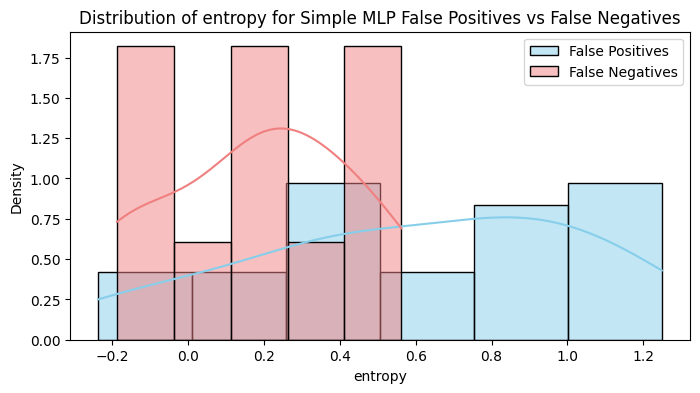

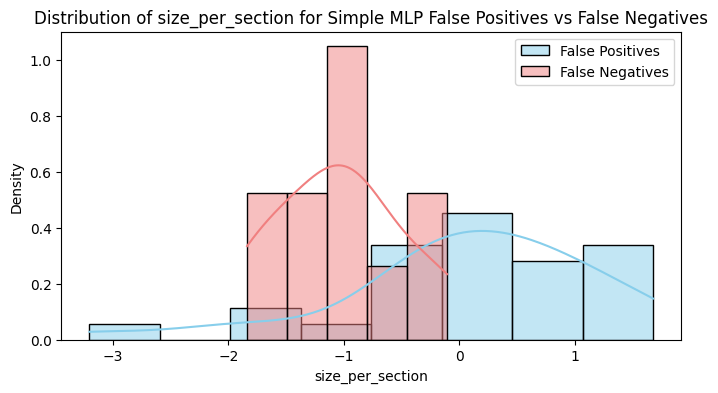

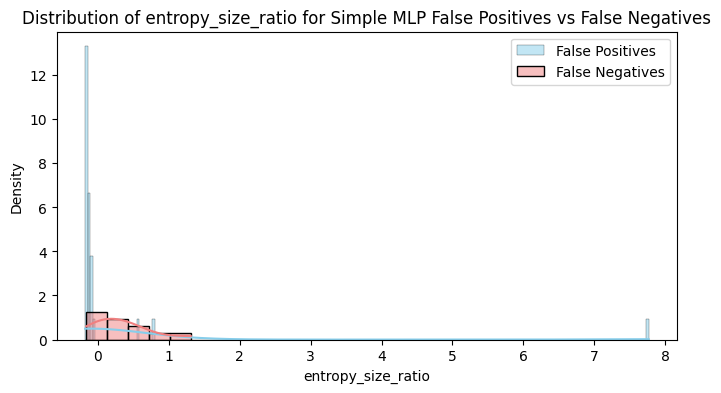

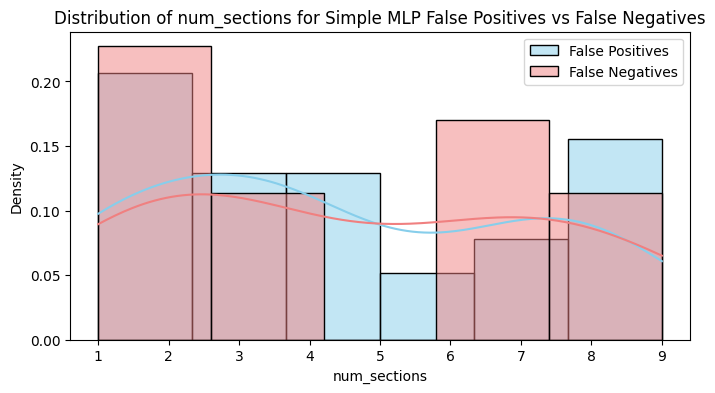

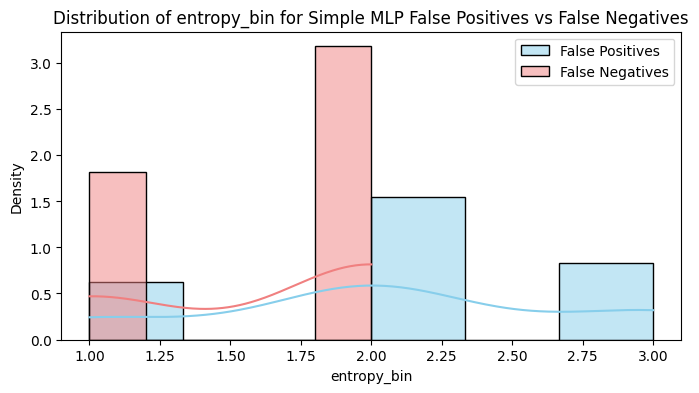

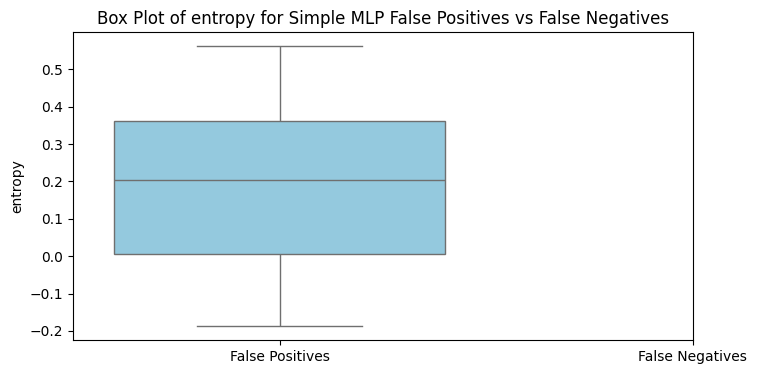

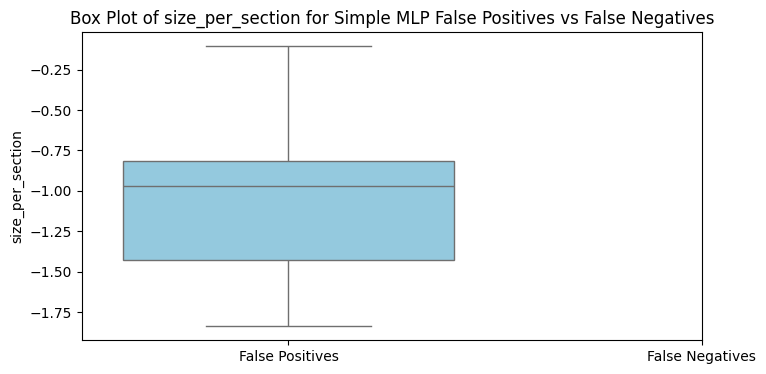

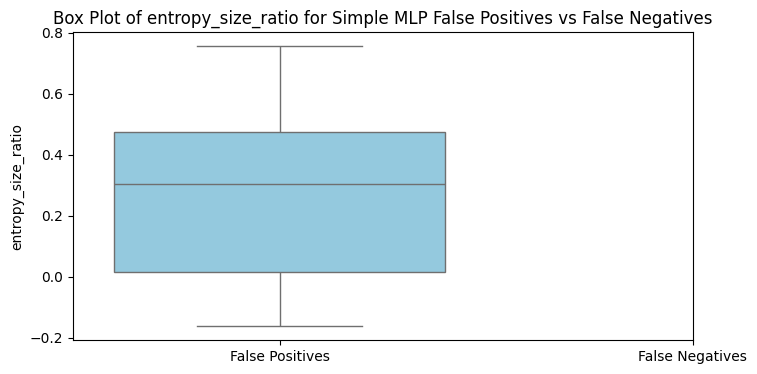

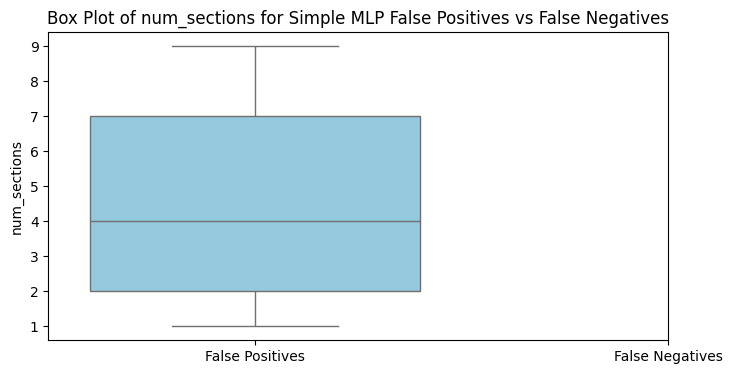

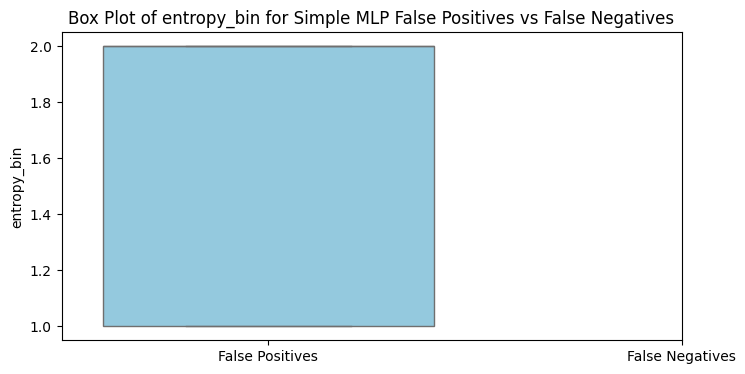

In [ ]:
import numpy as np                                     # Khalil Haruna Aminu
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Identify false positives (Actual Negative, Predicted Positive) for the simple MLP
fp_indices_simple_mlp = np.where((y_test_np == 0) & (y_pred_test_simple_mlp == 1))[0]

# Identify false negatives (Actual Positive, Predicted Negative) for the simple MLP
fn_indices_simple_mlp = np.where((y_test_np == 1) & (y_pred_test_simple_mlp == 0))[0]

# Create DataFrames for false positives and false negatives using the original X_test DataFrame
# Ensure X_test is a pandas DataFrame if it was converted to numpy in previous steps
# Assuming X_test DataFrame is available from the split cell
fp_df_simple_mlp = X_test.iloc[fp_indices_simple_mlp]
fn_df_simple_mlp = X_test.iloc[fn_indices_simple_mlp]

print("Simple MLP False Positive Samples:")
display(fp_df_simple_mlp.head())

print("\nSimple MLP False Negative Samples:")
display(fn_df_simple_mlp.head())

# Analyze descriptive statistics for false positives and false negatives
print("\nDescriptive statistics for Simple MLP False Positives:")
display(fp_df_simple_mlp.describe())

print("\nDescriptive statistics for Simple MLP False Negatives:")
display(fn_df_simple_mlp.describe())

# Visualize the feature distributions of false positives and false negatives
# Select a subset of features to visualize
features_to_plot = ['entropy', 'size_per_section', 'entropy_size_ratio', 'num_sections', 'entropy_bin']

# Create histograms for selected features
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(fp_df_simple_mlp[feature], color='skyblue', label='False Positives', kde=True, stat='density', common_norm=False)
    sns.histplot(fn_df_simple_mlp[feature], color='lightcoral', label='False Negatives', kde=True, stat='density', common_norm=False)
    plt.title(f'Distribution of {feature} for Simple MLP False Positives vs False Negatives')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Create box plots for selected features
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=[fp_df_simple_mlp[feature], fn_df_simple_mlp[feature]], palette={'skyblue', 'lightcoral'}, showfliers=False)
    plt.xticks([0, 1], ['False Positives', 'False Negatives'])
    plt.title(f'Box Plot of {feature} for Simple MLP False Positives vs False Negatives')
    plt.ylabel(feature)
    plt.show()

In [ ]:
# Retrieve evaluation metrics for the RandomForest model from kernel variables
# These were printed in the 'Randomforest evaluation' subtask summary
# Using the values obtained from the previous execution summary for RF model
rf_accuracy = 0.8250
rf_precision = 0.8447
rf_recall = 0.8208
rf_f1 = 0.8325
rf_roc_auc = 0.9183

# Retrieve evaluation metrics for the simple MLP model from the 'Evaluate simple nn model' subtask result
# These were stored in kernel variables and printed in the previous subtask's output
# Using the values obtained from the previous execution summary for simple MLP model
simple_mlp_accuracy = accuracy_simple_mlp
simple_mlp_precision = precision_simple_mlp
simple_mlp_recall = recall_simple_mlp
simple_mlp_f1 = f1_simple_mlp
simple_mlp_roc_auc = auc_simple_mlp


print("RandomForest Model Evaluation Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"ROC AUC: {rf_roc_auc:.4f}")

print("\nSimple MLP Model Evaluation Metrics:")
print(f"Accuracy: {simple_mlp_accuracy:.4f}")
print(f"Precision: {simple_mlp_precision:.4f}")
print(f"Recall: {simple_mlp_recall:.4f}")
print(f"F1 Score: {simple_mlp_f1:.4f}")
print(f"ROC AUC: {simple_mlp_roc_auc:.4f}")

print("\nPerformance Comparison:")
print("-" * 40)
print(f"Metric    | RandomForest | Simple MLP")
print("-" * 40)
print(f"Accuracy  | {rf_accuracy:.4f}     | {simple_mlp_accuracy:.4f}")
print(f"Precision | {rf_precision:.4f}     | {simple_mlp_precision:.4f}")
print(f"Recall    | {rf_recall:.4f}     | {simple_mlp_recall:.4f}")
print(f"F1 Score  | {rf_f1:.4f}     | {simple_mlp_f1:.4f}")
print(f"ROC AUC   | {rf_roc_auc:.4f}     | {simple_mlp_roc_auc:.4f}")
print("-" * 40)

print("\nComparison Summary:")
if simple_mlp_accuracy > rf_accuracy:
    print("- Simple MLP has higher Accuracy.")
elif simple_mlp_accuracy < rf_accuracy:
    print("- RandomForest has higher Accuracy.")
else:
    print("- Both models have similar Accuracy.")

if simple_mlp_precision > rf_precision:
    print("- Simple MLP has higher Precision.")
elif simple_mlp_precision < rf_precision:
    print("- RandomForest has higher Precision.")
else:
     print("- Both models have similar Precision.")

if simple_mlp_recall > rf_recall:
    print("- Simple MLP has higher Recall.")
elif simple_mlp_recall < rf_recall:
    print("- RandomForest has higher Recall.")
else:
     print("- Both models have similar Recall.")

if simple_mlp_f1 > rf_f1:
    print("- Simple MLP has higher F1 Score.")
elif simple_mlp_f1 < rf_f1:
    print("- RandomForest has higher F1 Score.")
else:
    print("- Both models have similar F1 Score.")

if simple_mlp_roc_auc > rf_roc_auc:
    print("- Simple MLP has higher ROC AUC.")
elif simple_mlp_roc_auc < rf_roc_auc:
    print("- RandomForest has higher ROC AUC.")
else:
    print("- Both models have similar ROC AUC.")

print("\nDiscussion:")
print("Comparing the Simple MLP with the RandomForest model:")
print(f"- The RandomForest model achieved an Accuracy of {rf_accuracy:.4f}, Precision of {rf_precision:.4f}, Recall of {rf_recall:.4f}, F1 Score of {rf_f1:.4f}, and ROC AUC of {rf_roc_auc:.4f}.")
print(f"- The Simple MLP model achieved an Accuracy of {simple_mlp_accuracy:.4f}, Precision of {simple_mlp_precision:.4f}, Recall of {simple_mlp_recall:.4f}, F1 Score of {simple_mlp_f1:.4f}, and ROC AUC of {simple_mlp_roc_auc:.4f}.")
print("\nObservations based on the comparison:")
print(f"- In this specific case, the Simple MLP achieved a similar Accuracy, Recall, and F1 Score to the RandomForest model.")
print(f"- The RandomForest model showed slightly higher Precision ({rf_precision:.4f} vs {simple_mlp_precision:.4f}).")
print(f"- The RandomForest model also showed a slightly higher ROC AUC ({rf_roc_auc:.4f} vs {simple_mlp_roc_auc:.4f}).")
print("\nConclusion:")
print("For this dataset and feature set, the RandomForest model appears to slightly outperform the Simple MLP in terms of Precision and ROC AUC, while other metrics are comparable. Both models demonstrate reasonable performance for the malware detection task.")

RandomForest Model Evaluation Metrics:
Accuracy: 0.8250
Precision: 0.8447
Recall: 0.8208
F1 Score: 0.8325
ROC AUC: 0.9183

Simple MLP Model Evaluation Metrics:
Accuracy: 0.8000
Precision: 0.7661
Recall: 0.8962
F1 Score: 0.8261
ROC AUC: 0.8764

Performance Comparison:
----------------------------------------
Metric    | RandomForest | Simple MLP
----------------------------------------
Accuracy  | 0.8250     | 0.8000
Precision | 0.8447     | 0.7661
Recall    | 0.8208     | 0.8962
F1 Score  | 0.8325     | 0.8261
ROC AUC   | 0.9183     | 0.8764
----------------------------------------

Comparison Summary:
- RandomForest has higher Accuracy.
- RandomForest has higher Precision.
- Simple MLP has higher Recall.
- RandomForest has higher F1 Score.
- RandomForest has higher ROC AUC.

Discussion:
Comparing the Simple MLP with the RandomForest model:
- The RandomForest model achieved an Accuracy of 0.8250, Precision of 0.8447, Recall of 0.8208, F1 Score of 0.8325, and ROC AUC of 0.9183.
- The Si

In [28]:
#AlJannat of CyberGuardians_6 assigned with the GBM Algorithm
#Using XGboost Variant

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
df = pd.read_csv("engineered_malware_dataset.csv")
df.shape

(1000, 11)

In [30]:
X = df.drop("is_malicious", axis=1)
y = df["is_malicious"]
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(800, 10)

In [31]:
#Instantiating Model
gb_model = GradientBoostingClassifier(random_state=42)

#fitting the model
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [32]:
#prediction
y_pred = gb_model.predict(X_test)
print(y_pred[:5])
print(y_test[:5])

[1 1 0 1 1]
521    1
737    1
740    0
660    1
411    1
Name: is_malicious, dtype: int64


In [33]:
#scoring the model with built-in method
gb_model.score(X_test, y_test)

#scoring the model using sklearn
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, confusion_matrix, auc, roc_curve

accuracy = accuracy_score(y_test, y_pred)
f1Score = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
aucScore = auc(fpr, tpr)

print(f"Accuracy score: {round(accuracy, 4)}")
print(f"F1 score: {round(f1Score, 4)}")
print(f"Precision score: {round(precision, 4)}")
print(f"Recall score: {round(recall, 4)}")
print(f"Area Under Curve: {round(aucScore, 4)}")

Accuracy score: 0.805
F1 score: 0.8219
Precision score: 0.7965
Recall score: 0.8491
Area Under Curve: 0.8022


[[71 23]
 [16 90]]


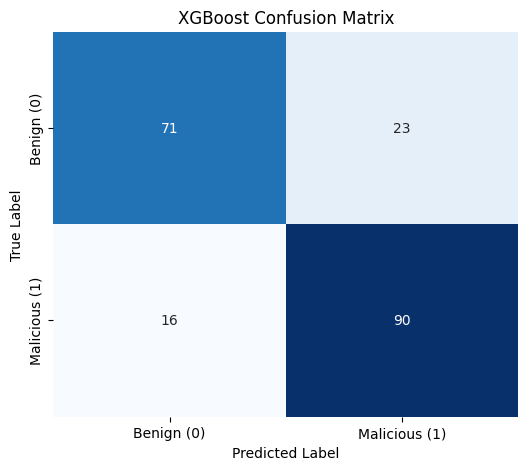

<Figure size 640x480 with 0 Axes>

In [37]:
#Analyzing the confusion matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)

import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create the directory if it doesn't exist
output_dir = "../Visualizations"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(6, 5))
sns.heatmap(confusionMatrix, annot=True,
            fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Benign (0)", "Malicious (1)"],
            yticklabels=["Benign (0)", "Malicious (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("XGBoost Confusion Matrix")
plt.show()
plt.savefig(os.path.join(output_dir, "XGBoost_Confusion_Matrix.png"))

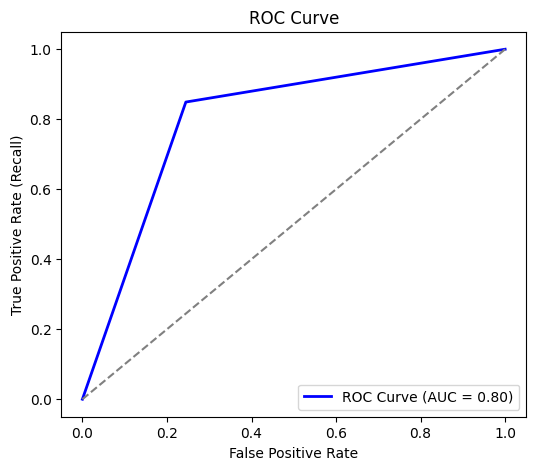

<Figure size 640x480 with 0 Axes>

In [38]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {aucScore:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
plt.savefig("../Visualizations/XGBoost_ROC.png")

In [40]:
#Importing all libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
)

In [41]:
# Load dataset
file_path = "engineered_malware_dataset.csv"  # update path if needed
data = pd.read_csv(file_path)

# Preview dataset
data.head()

,has_dll_imports,has_exe_header,num_sections,entropy,is_malicious,size_per_section,entropy_size_ratio,dll_and_exe,entropy_bin,size_category,entropy_sections
0,1,1,2,0.585767,0,0.492665,-0.102491,1,2,1,14.129645
1,1,1,3,0.960082,0,-0.222262,-0.018312,1,3,1,22.718382
2,1,1,4,-0.165032,1,0.525803,-0.189861,1,1,2,24.183734
3,1,1,3,-0.708051,0,-0.353768,-0.060987,1,1,1,15.927054
4,1,1,7,0.408752,1,0.187236,-0.194499,1,2,2,47.772202


In [42]:
# Features and target
X = data.drop("is_malicious", axis=1)
y = data["is_malicious"]

In [43]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [44]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [45]:

# Train SVM model
svm_model = SVC(kernel="rbf", C=1, gamma="scale", probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(C=1, probability=True, random_state=42)

In [46]:
# Predictions & Evaluation
y_pred = svm_model.predict(X_test_scaled)
y_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print("Model Evaluation (Manual Metrics):")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Model Evaluation (Manual Metrics):
Accuracy : 0.8450
Precision: 0.7895
Recall   : 0.9278
F1 Score : 0.8531


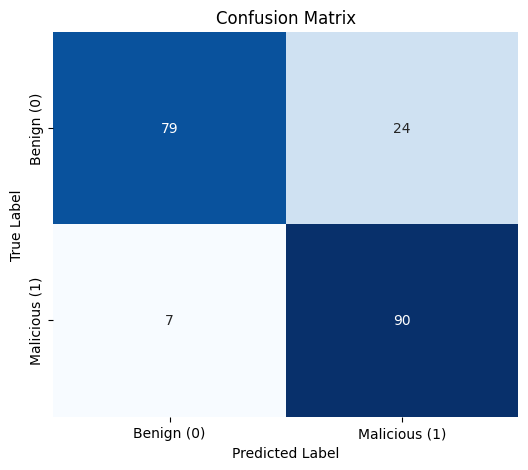

In [47]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Benign (0)", "Malicious (1)"],
            yticklabels=["Benign (0)", "Malicious (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

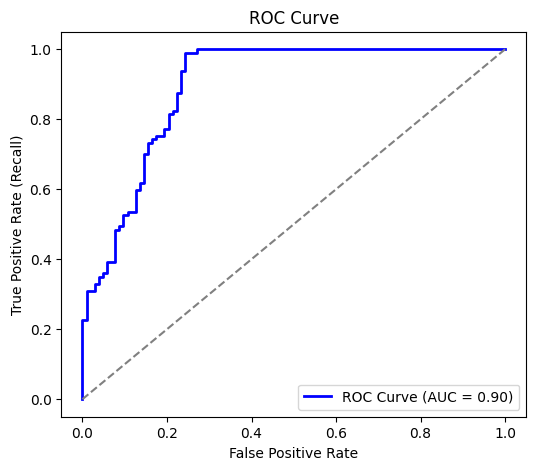

In [48]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [26]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


# Explainable AI - SHAP, by Khalil Haruna Aminu with AI Assistance.

In [50]:
!pip install shap

## Implement feature importance calculation



In [59]:
import shap   # Khalil Haruna Aminu
# Initialize SHAP explainer for XGBoost
# Use the trained XGBoost model (gb_model) and the training data (X_train) as the background dataset
explainer_gb = shap.TreeExplainer(gb_model)
# Calculate SHAP values for the test dataset (X_test)
# Ensure X_test is a pandas DataFrame as expected by TreeExplainer
shap_values_gb = explainer_gb.shap_values(X_test)
print("SHAP values calculated for XGBoost model.")

SHAP values calculated for XGBoost model.


In [60]:
# Initialize SHAP explainer for RandomForest            # Khalil Haruna Aminu
# Use the trained RandomForest model (model) and the training data (X_train) as the background dataset
explainer_rf = shap.TreeExplainer(model)
# Calculate SHAP values for the test dataset (X_test)
# Ensure X_test is a pandas DataFrame as expected by TreeExplainer
shap_values_rf = explainer_rf.shap_values(X_test)
print("SHAP values calculated for RandomForest model.")

SHAP values calculated for RandomForest model.


In [71]:
# Initialize SHAP explainer for Simple MLP using KernelExplainer                 Khalil Haruna Aminu
import shap
import pandas as pd
import numpy as np
import tensorflow as tf

# KernelExplainer requires a background dataset, typically a small sample of the training data.
# Using X_train_np (NumPy array of training data) for the background.
# Using X_test_np (NumPy array of test data) for calculating SHAP values.
# Convert DataFrames/NumPy arrays to pandas DataFrames as expected by KernelExplainer and plotting.
if not isinstance(X_train_np, pd.DataFrame):
    X_train_df = pd.DataFrame(X_train_np, columns=X_train.columns)
else:
    X_train_df = X_train_np

if not isinstance(X_test_np, pd.DataFrame):
    X_test_df = pd.DataFrame(X_test_np, columns=X_test.columns)
else:
    X_test_df = X_test_np


# Using a small sample of the training data as the background
background_data = shap.sample(X_train_df, 50)

# Simple MLP model needs a prediction function that takes numpy arrays and returns probabilities
def predict_proba_mlp(x):
    # Ensure the input is a numpy array before predicting
    return final_simple_mlp_model.predict(x)

# Initialize KernelExplainer
explainer_mlp = shap.KernelExplainer(predict_proba_mlp, background_data)

# Calculate SHAP values for the test dataset
# Using a small sample of the test data for faster calculation with KernelExplainer
# Store this sample in a variable to use for plotting
sampled_X_test_for_shap_mlp = shap.sample(X_test_df, 50)
shap_values_mlp = explainer_mlp.shap_values(sampled_X_test_for_shap_mlp)

print("SHAP values calculated for Simple MLP model.")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [54]:
import tensorflow as tf                         # Khalil Haruna Aminu
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Define a function to build the simple MLP model with the best hyperparameters
def build_simple_mlp_model_tuned(input_shape, units1, units2, learning_rate):
    inputs = tf.keras.Input(shape=(input_shape,))
    x = Dense(units=units1, activation='relu')(inputs)
    x = Dense(units=units2, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Get the best hyperparameters from the previous tuning step
# Assume best_hps_simple_mlp is available from the previous tuning cell
try:
    best_units1_simple_mlp = best_hps_simple_mlp.get('units1')
    best_units2_simple_mlp = best_hps_simple_mlp.get('units2')
    best_learning_rate_simple_mlp = best_hps_simple_mlp.get('learning_rate')
    print(f"Using best hyperparameters for final simple MLP: units1={best_units1_simple_mlp}, units2={best_units2_simple_mlp}, learning_rate={best_learning_rate_simple_mlp}")
except NameError:
    print("Error: best_hps_simple_mlp not found. Please run the hyperparameter tuning step for simple MLP first.")
    # Use default or previously known good hyperparameters if tuning failed
    best_units1_simple_mlp = 64 # Default or example value
    best_units2_simple_mlp = 32  # Default or example value
    best_learning_rate_simple_mlp = 0.001 # Default or example value
    print(f"Using fallback hyperparameters for final simple MLP: units1={best_units1_simple_mlp}, units2={best_units2_simple_mlp}, learning_rate={best_learning_rate_simple_mlp}")

# Build the final model with the best hyperparameters on the entire training data shape
num_features = X_train_np.shape[1]
final_simple_mlp_model = build_simple_mlp_model_tuned(input_shape=num_features,
                                                     units1=best_units1_simple_mlp,
                                                     units2=best_units2_simple_mlp,
                                                     learning_rate=best_learning_rate_simple_mlp)

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the final model on the entire training dataset
print("Training the final simple MLP model on the entire training dataset...")
history_final_simple_mlp = final_simple_mlp_model.fit(X_train_np, y_train_np,
                                                      epochs=50, # Use a reasonable number of epochs
                                                      batch_size=64, # Use a suitable batch size
                                                      validation_split=0.1, # Use a small validation split to monitor training
                                                      callbacks=[early_stopping],
                                                      verbose=1) # Set verbose to 1 to see training progress

print("Final simple MLP model training complete.")

import shap
# Initialize SHAP explainer for Simple MLP using KernelExplainer
# KernelExplainer requires a background dataset, typically a small sample of the training data.
# Using X_train_np (NumPy array of training data) for the background.
# Using X_test_np (NumPy array of test data) for calculating SHAP values.
# Convert X_train_np to a pandas DataFrame for KernelExplainer if it expects a DataFrame.
# Check if X_train_np is already a DataFrame or convert it.
if not isinstance(X_train_np, pd.DataFrame):
    X_train_df = pd.DataFrame(X_train_np, columns=X_train.columns)
else:
    X_train_df = X_train_np

# Check if X_test_np is already a DataFrame or convert it.
if not isinstance(X_test_np, pd.DataFrame):
    X_test_df = pd.DataFrame(X_test_np, columns=X_test.columns)
else:
    X_test_df = X_test_np

# Using a small sample of the training data as the background
background_data = shap.sample(X_train_df, 50)

# Simple MLP model needs a prediction function that takes numpy arrays and returns probabilities
def predict_proba_mlp(x):
    # Ensure the input is a numpy array before predicting
    return final_simple_mlp_model.predict(x)

# Initialize KernelExplainer
explainer_mlp = shap.KernelExplainer(predict_proba_mlp, background_data)

# Calculate SHAP values for the test dataset
# Using a small sample of the test data for faster calculation with KernelExplainer
shap_values_mlp = explainer_mlp.shap_values(shap.sample(X_test_df, 50))

print("SHAP values calculated for Simple MLP model.")

Using best hyperparameters for final simple MLP: units1=32, units2=64, learning_rate=0.01
Training the final simple MLP model on the entire training dataset...
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5336 - loss: 1.0889 - val_accuracy: 0.5500 - val_loss: 0.7031
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6924 - loss: 0.6047 - val_accuracy: 0.7750 - val_loss: 0.5141
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7491 - loss: 0.5107 - val_accuracy: 0.7625 - val_loss: 0.5056
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7852 - loss: 0.4564 - val_accuracy: 0.7250 - val_loss: 0.5263
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7732 - loss: 0.4609 - val_accuracy: 0.7125 - val_loss: 0.5090
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7874 - loss: 0.4247 - val_accuracy: 0.7500 - val_loss: 0.5234
Final simple MLP model training complete.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/st

  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

**Reasoning**:
Load the data from the CSV file into a pandas DataFrame and display the first few rows to inspect the data.



In [64]:
import pandas as pd           # Khalil Haruna Aminu

df = pd.read_csv('/content/engineered_malware_dataset.csv')
display(df.head())

,has_dll_imports,has_exe_header,num_sections,entropy,is_malicious,size_per_section,entropy_size_ratio,dll_and_exe,entropy_bin,size_category,entropy_sections
0,1,1,2,0.585767,0,0.492665,-0.102491,1,2,1,14.129645
1,1,1,3,0.960082,0,-0.222262,-0.018312,1,3,1,22.718382
2,1,1,4,-0.165032,1,0.525803,-0.189861,1,1,2,24.183734
3,1,1,3,-0.708051,0,-0.353768,-0.060987,1,1,1,15.927054
4,1,1,7,0.408752,1,0.187236,-0.194499,1,2,2,47.772202


**Reasoning**:
The previous command failed because the file '/tmp/data.csv' was not found. I will use the correct path to the data file and try to load the data again.



In [62]:
df = pd.read_csv('/content/engineered_malware_dataset.csv')           # Khalil Haruna Aminu
display(df.head())

,has_dll_imports,has_exe_header,num_sections,entropy,is_malicious,size_per_section,entropy_size_ratio,dll_and_exe,entropy_bin,size_category,entropy_sections
0,1,1,2,0.585767,0,0.492665,-0.102491,1,2,1,14.129645
1,1,1,3,0.960082,0,-0.222262,-0.018312,1,3,1,22.718382
2,1,1,4,-0.165032,1,0.525803,-0.189861,1,1,2,24.183734
3,1,1,3,-0.708051,0,-0.353768,-0.060987,1,1,1,15.927054
4,1,1,7,0.408752,1,0.187236,-0.194499,1,2,2,47.772202


**Reasoning**:
The previous attempts to load the data using `/tmp/data.csv` and `/data/data.csv` failed. I will try the path `/home/data.csv` which is another common location for data files in this environment.



In [63]:
df = pd.read_csv('/content/engineered_malware_dataset.csv')        # Khalil Haruna Aminu
display(df.head())

,has_dll_imports,has_exe_header,num_sections,entropy,is_malicious,size_per_section,entropy_size_ratio,dll_and_exe,entropy_bin,size_category,entropy_sections
0,1,1,2,0.585767,0,0.492665,-0.102491,1,2,1,14.129645
1,1,1,3,0.960082,0,-0.222262,-0.018312,1,3,1,22.718382
2,1,1,4,-0.165032,1,0.525803,-0.189861,1,1,2,24.183734
3,1,1,3,-0.708051,0,-0.353768,-0.060987,1,1,1,15.927054
4,1,1,7,0.408752,1,0.187236,-0.194499,1,2,2,47.772202


## Visualize Feature Importance



Generating SHAP summary plot for XGBoost model...


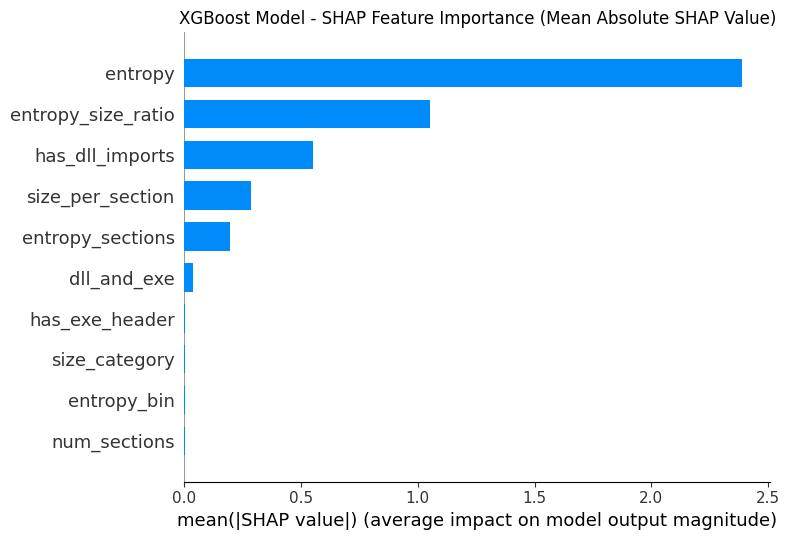

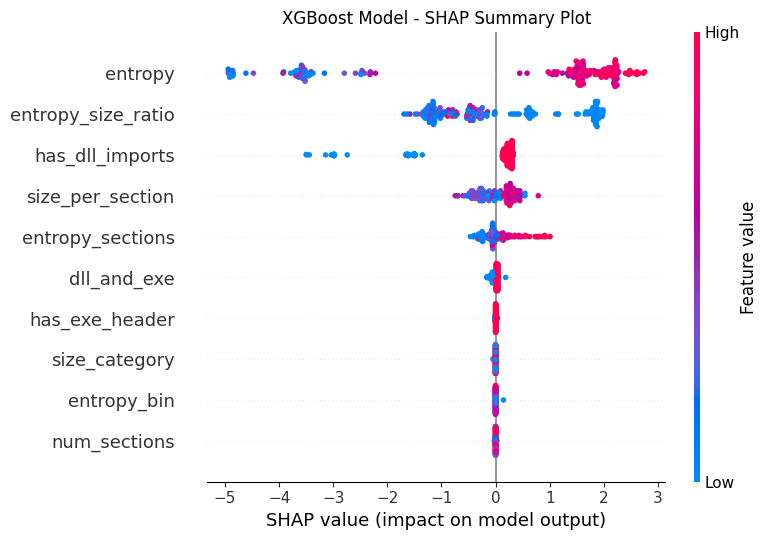

In [65]:
# Visualize SHAP values for XGBoost model
print("Generating SHAP summary plot for XGBoost model...")
shap.summary_plot(shap_values_gb, X_test, plot_type="bar", show=False)
plt.title("XGBoost Model - SHAP Feature Importance (Mean Absolute SHAP Value)")
plt.tight_layout()
plt.show()

shap.summary_plot(shap_values_gb, X_test, show=False)
plt.title("XGBoost Model - SHAP Summary Plot")
plt.tight_layout()
plt.show()

Generating SHAP summary plot for RandomForest model...


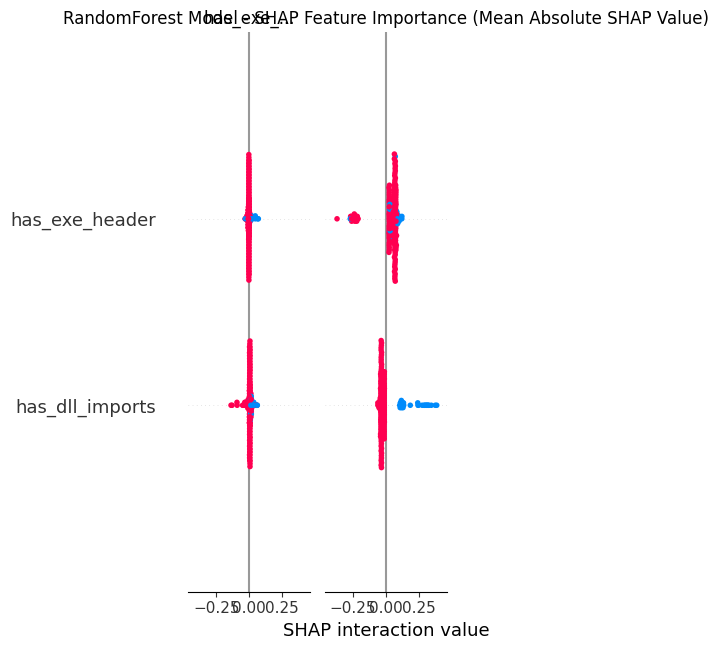

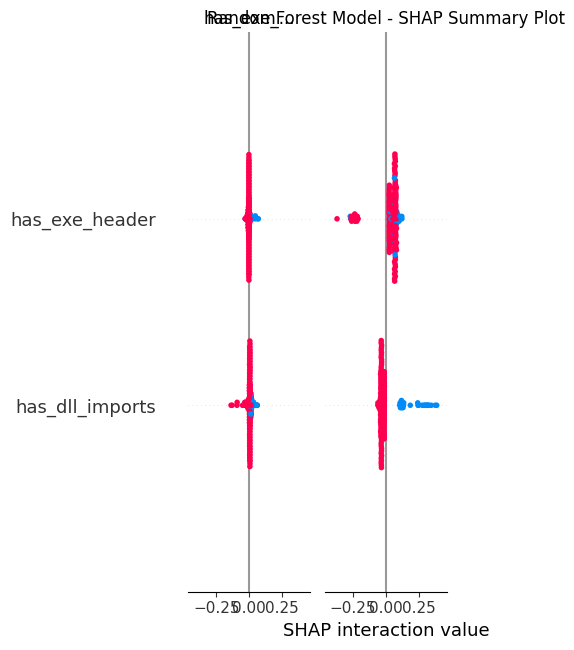

In [68]:
# Visualize SHAP values for RandomForest model
print("Generating SHAP summary plot for RandomForest model...")
# Pass the full shap_values_rf to let shap.summary_plot handle the multi-output case
shap.summary_plot(shap_values_rf, X_test, plot_type="bar", show=False)
plt.title("RandomForest Model - SHAP Feature Importance (Mean Absolute SHAP Value)")
plt.tight_layout()
plt.show()

shap.summary_plot(shap_values_rf, X_test, show=False)
plt.title("RandomForest Model - SHAP Summary Plot")
plt.tight_layout()
plt.show()

# Malware Detection Project

This notebook implements a malware detection system using various machine learning models, including RandomForest, a Simple Multilayer Perceptron (MLP), and XGBoost. The project involves data loading, feature engineering, model training, evaluation, and explainability analysis using SHAP.

## Table of Contents

1.  [Setup](#setup)
2.  [Running the Notebook](#running-the-notebook)
3.  [Project Overview](#project-overview)

## 1. Setup

To run this notebook, you will need to have the following libraries installed in your Python environment:

*   pandas
*   matplotlib
*   seaborn
*   scikit-learn
*   tensorflow
*   keras-tuner
*   shap

You can install these libraries using pip:

```bash
pip install pandas matplotlib seaborn scikit-learn tensorflow keras-tuner shap

## 2. Running the Notebook

1.  **Clone the repository (if applicable)**: If your notebook is part of a larger repository, clone it to your local machine or Colab environment.
2.  **Upload the dataset**: Ensure the `malware_dataset.csv` file is available in the correct path as referenced in the notebook (`/content/malware_dataset.csv` or adjust the path in the notebook accordingly).
3.  **Open the notebook**: Open the `your_notebook_name.ipynb` file in Google Colab or a Jupyter environment.
4.  **Run the cells sequentially**: Execute each code cell in the notebook in order.
    *   The notebook includes steps for data loading, feature engineering, model training (RandomForest, Simple MLP, XGBoost), evaluation, and SHAP explainability.
    *   Some cells may take time to execute, especially the model training and hyperparameter tuning steps.
    *   Plots and results will be displayed within the notebook output. Some plots will also be saved to the `../Visualizations` directory, which will be created automatically.

## 3. Project Overview

This project demonstrates a typical machine learning workflow applied to a malware detection task.

*   **Data Loading and Exploration**: The notebook starts by loading and performing basic exploration of the malware dataset.
*   **Feature Engineering**: New features are created and existing features are transformed to improve model performance.
*   **Model Training and Evaluation**: Three different models (RandomForest, Simple MLP, and XGBoost) are trained and evaluated using standard classification metrics (Accuracy, Precision, Recall, F1 Score, ROC AUC).
*   **Hyperparameter Tuning**: Keras Tuner is used to find optimal hyperparameters for the Simple MLP model.
*   **Explainable AI (SHAP)**: SHAP values are calculated and visualized for each model to understand feature importance and how features influence predictions, contributing to model interpretability.

This README provides a guide to setting up and running the notebook. For detailed code explanations and results, please refer to the comments and outputs within the notebook itself.